# **[EXPORT]**  
**┗ 기본편🎉**
---

## **🔒 [제조] 문제**
---
* **제시된 제조 데이터(Time Series, 시계열)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# # ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Anomaly detection/tarea")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/Anomaly detection/tarea'

In [ ]:
import pandas as pd
df = pd.read_csv('example_1.csv', sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
# (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
print(df.shape)
print('---------------------------------------------')
# (2) Data type 확인 → 각 Column별 Data Type 출력
print(df.info())
# (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
print('---------------------------------------------')
print(df.isnull().sum())

(1063, 11)
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB
None
---------------------------------------------
datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Curren

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 시각화를 진행하시오.

  (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?
  
  (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
  총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.
  (※ x = 'datetime', y= 각 Column)

  (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.
  (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

```

OK Count: 730
NG Count: 333
Total Count: 1063


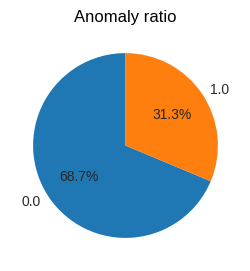

In [ ]:
# (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?

import matplotlib.pyplot as plt
import seaborn as sns

OK_ratio=(df['anomaly'].value_counts()[0]/len(df))*100
NG_ratio=(df['anomaly'].value_counts()[1]/len(df))*100
OK_count=(df['anomaly'].value_counts()[0])
NG_count=(df['anomaly'].value_counts()[1])
TOTAL_count=len(df)

print(f"OK Count: {OK_count}")
print(f"NG Count: {NG_count}")
print(f"Total Count: {TOTAL_count}")
# print(f"OK Ratio: {OK_ratio:.2f}%")
# print(f"NG Ratio: {NG_ratio:.2f}%")

plt.style.use(['seaborn-v0_8-dark'])
plt.figure(figsize=(3, 3))
plt.pie(df['anomaly'].value_counts(),labels=df['anomaly'].unique(), autopct='%1.1f%%',startangle=90)
plt.title('Anomaly ratio',color='black')
hole = plt.Circle((0, 0), 0.40, facecolor='white')



In [ ]:
df.columns

Index(['datetime', 'Accelerometer1RMS', 'Accelerometer2RMS', 'Current',
       'Pressure', 'Temperature', 'Thermocouple', 'Voltage',
       'Volume Flow RateRMS', 'anomaly', 'changepoint'],
      dtype='object')

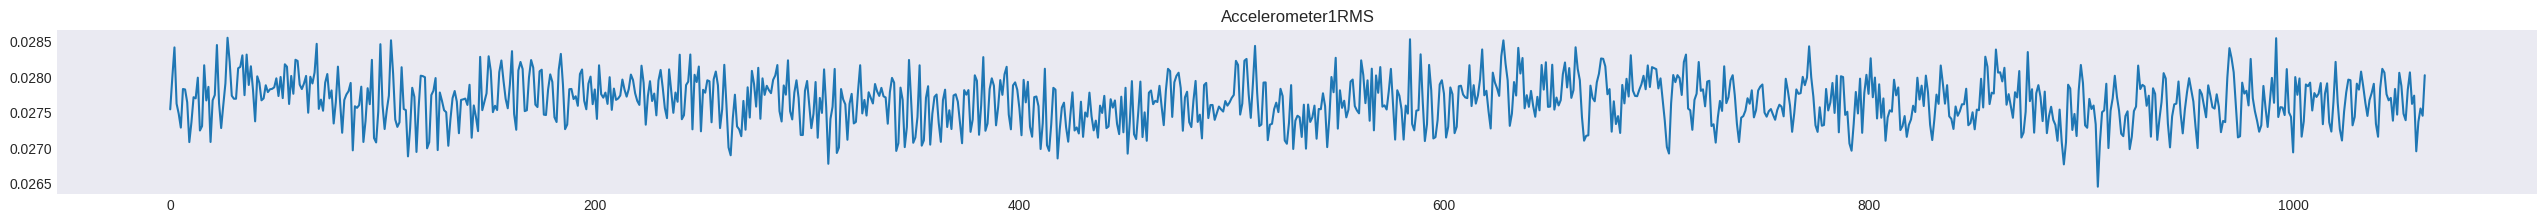

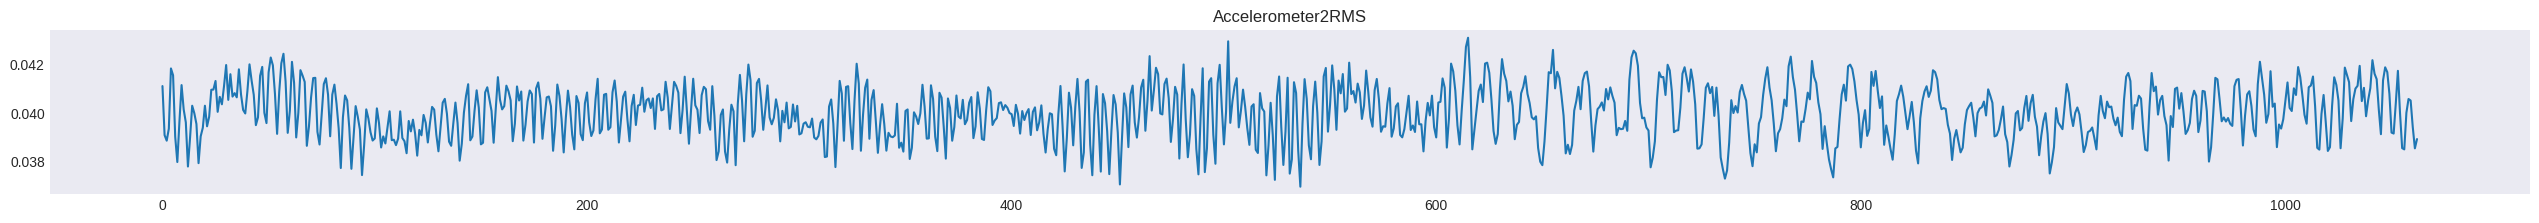

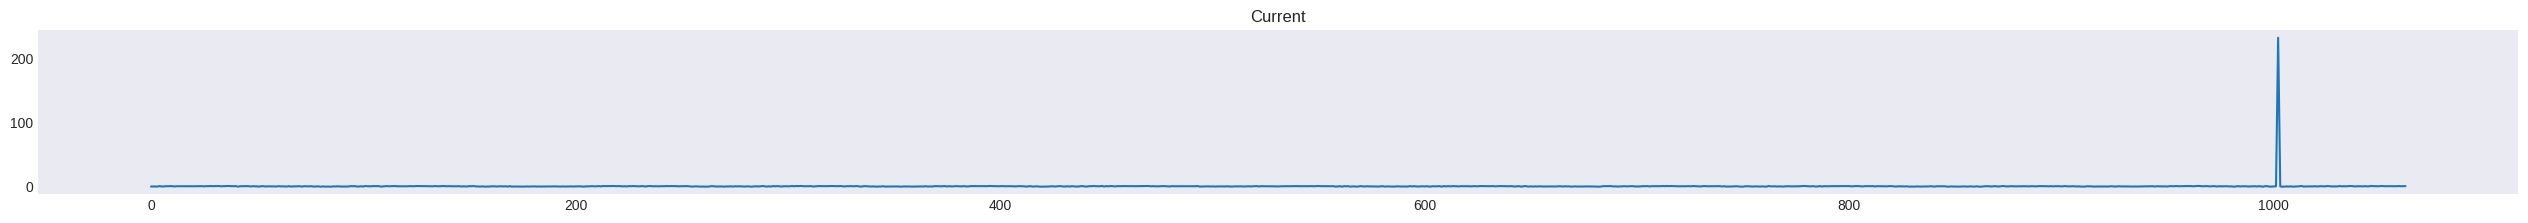

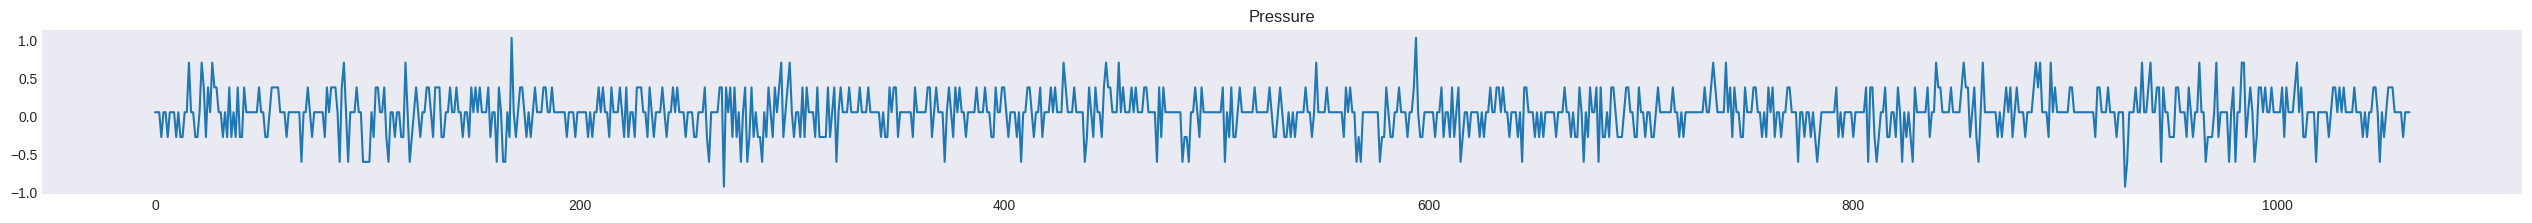

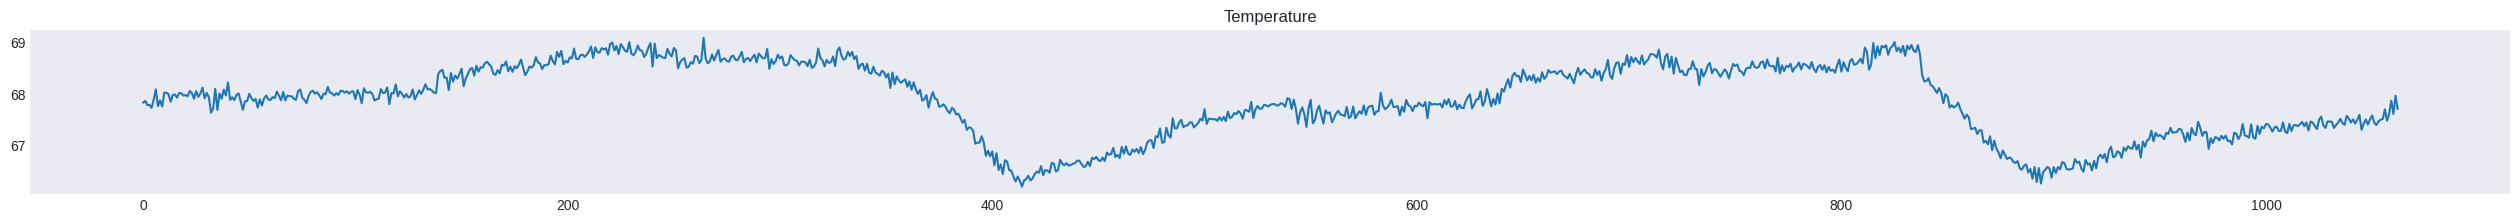

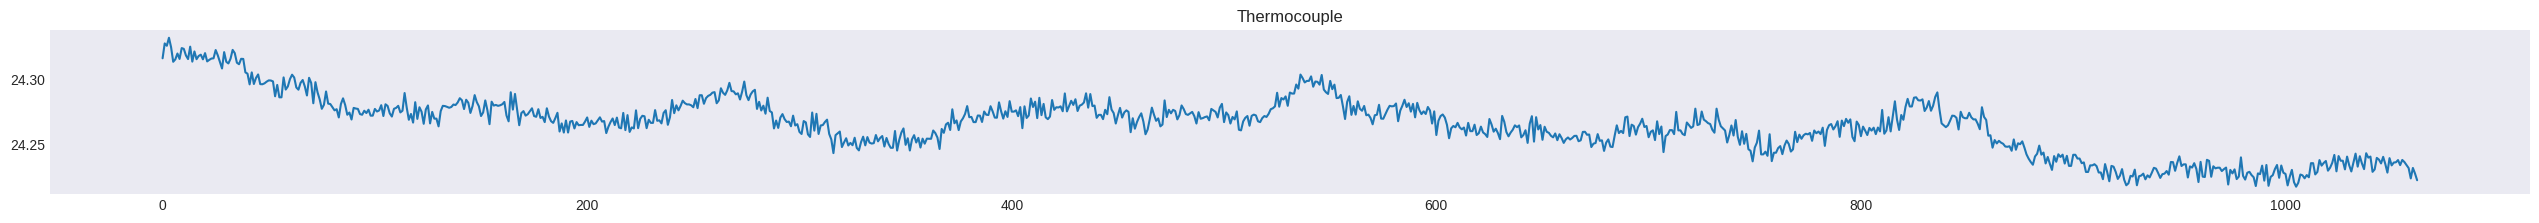

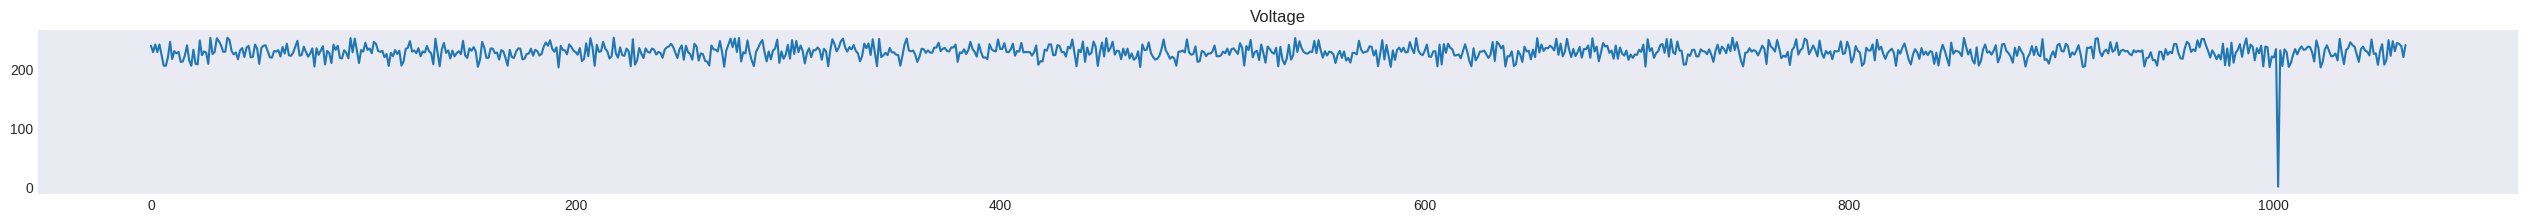

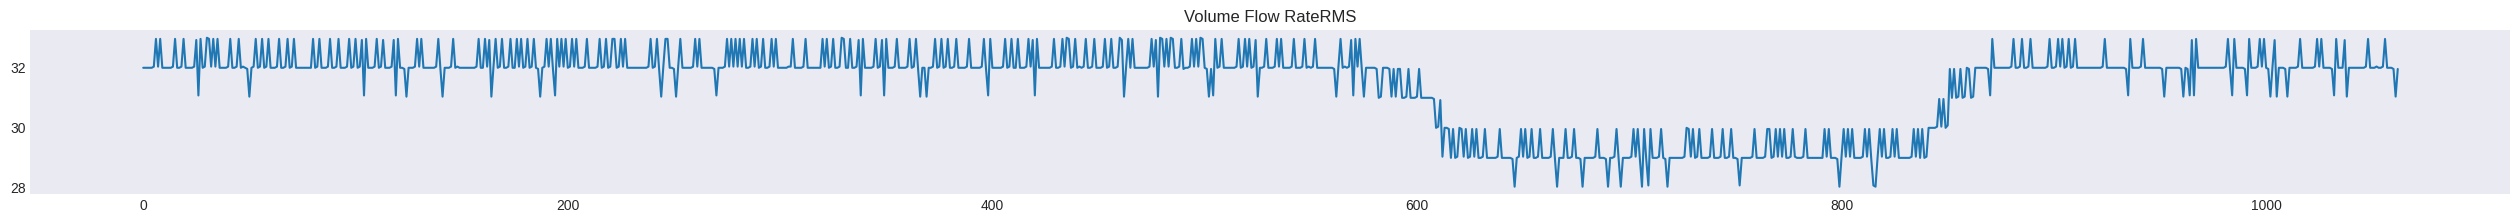

In [ ]:
# (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS' 총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오. (※ x = 'datetime', y= 각 Column)

import numpy as np

plt.style.use(['seaborn-v0_8-dark'])

for v, i in enumerate(df.columns[1:9]) :
  plt.figure(figsize=(32,20))
  plt.subplot(8,1,v+1)
  plt.plot(df.index,df[i])
  plt.title(i)

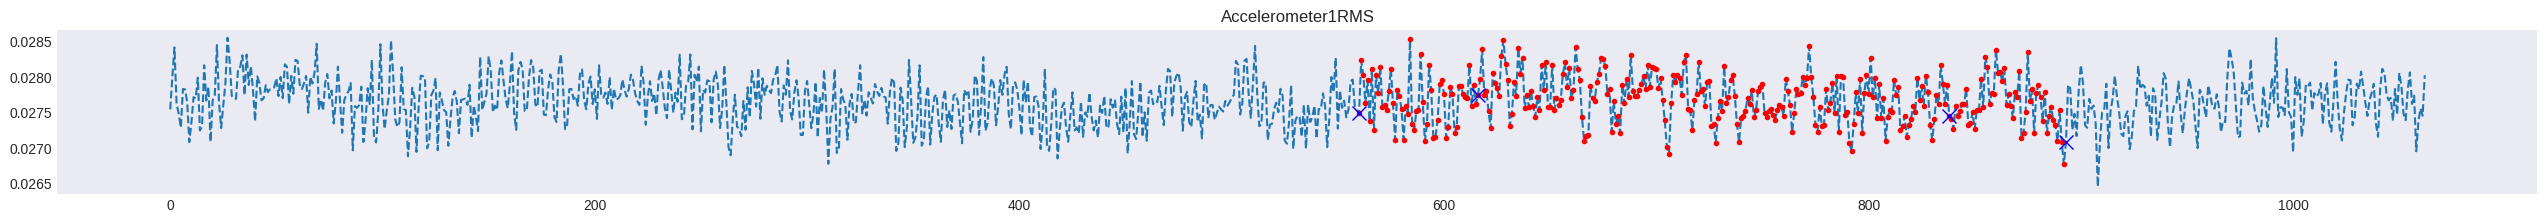

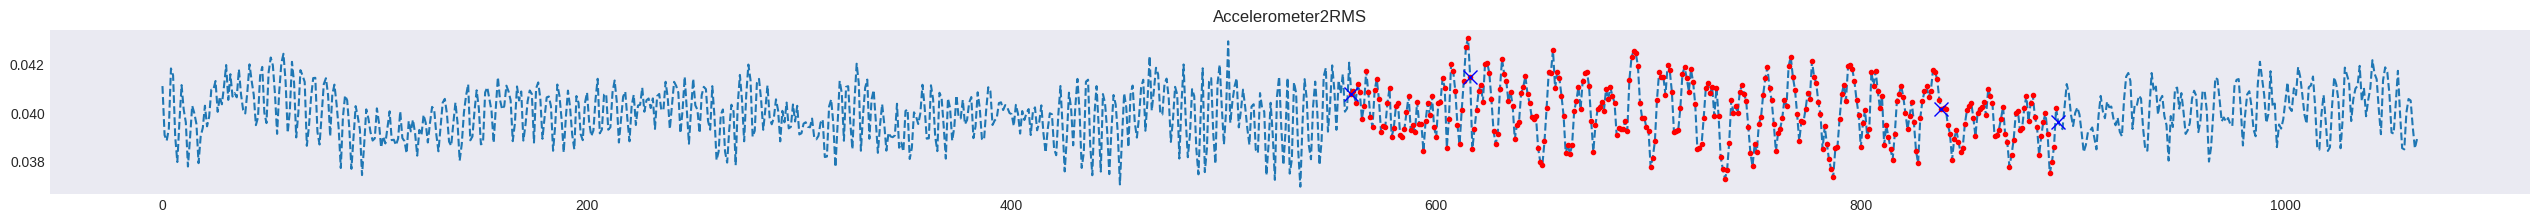

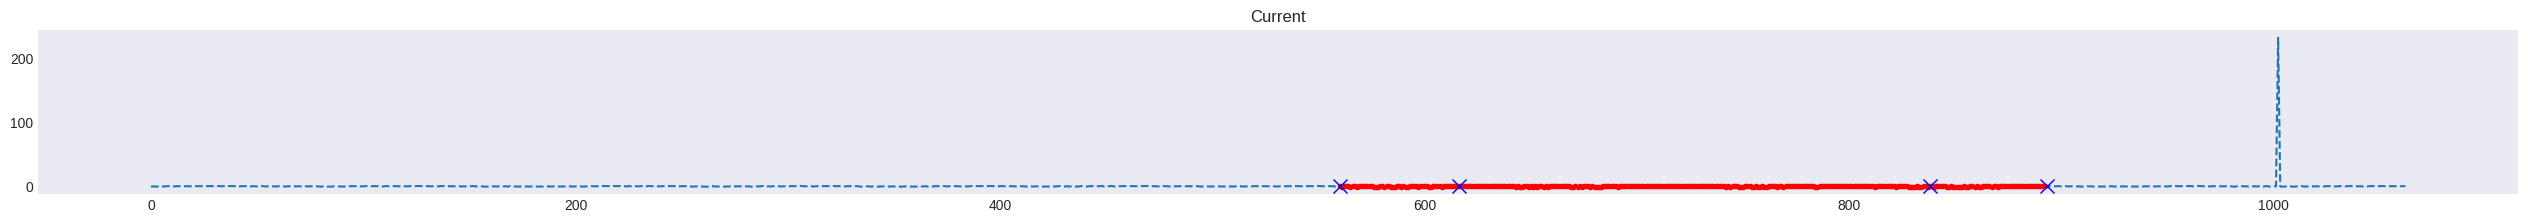

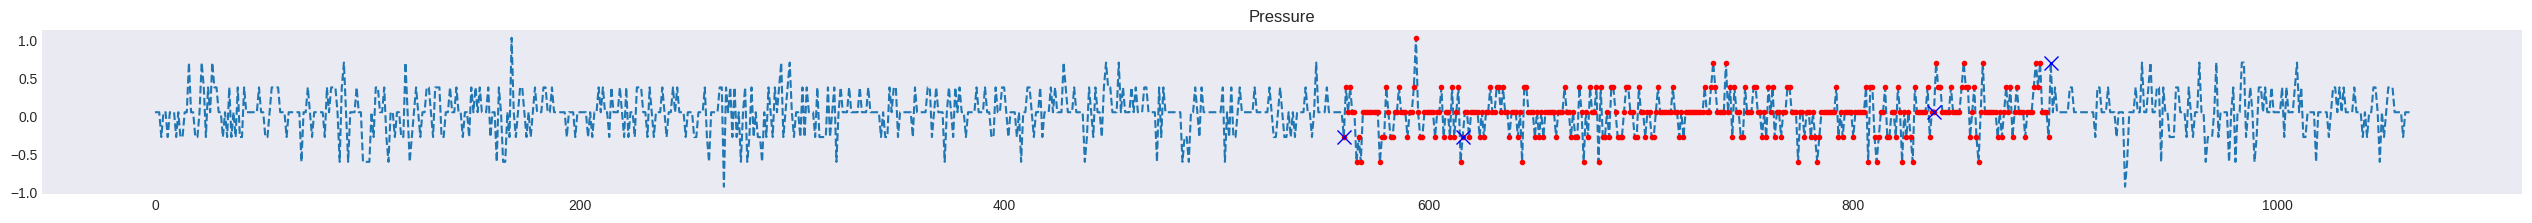

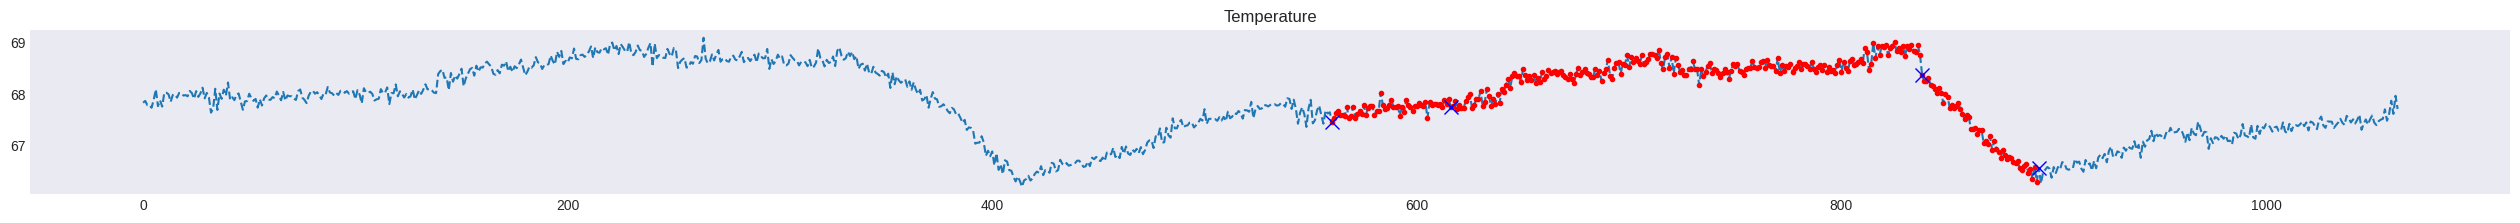

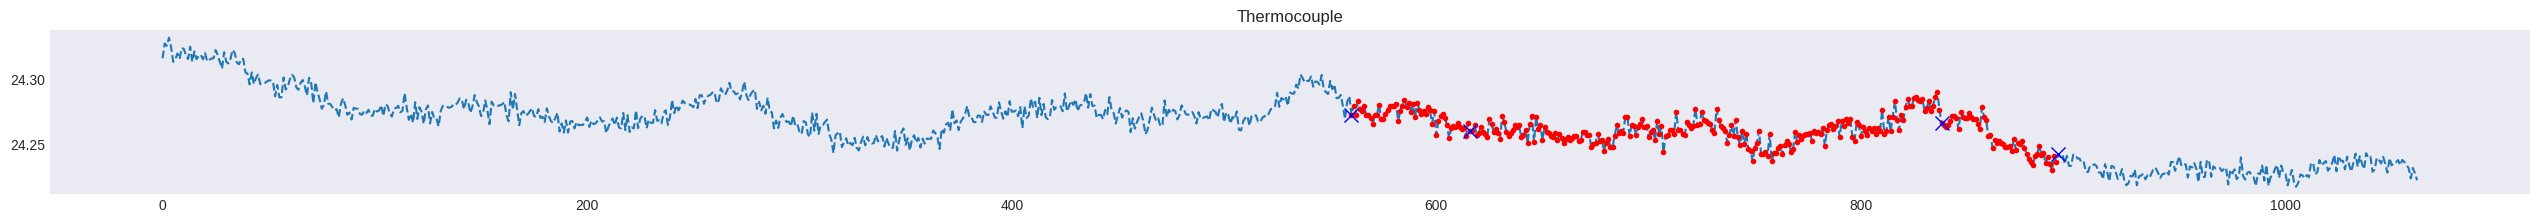

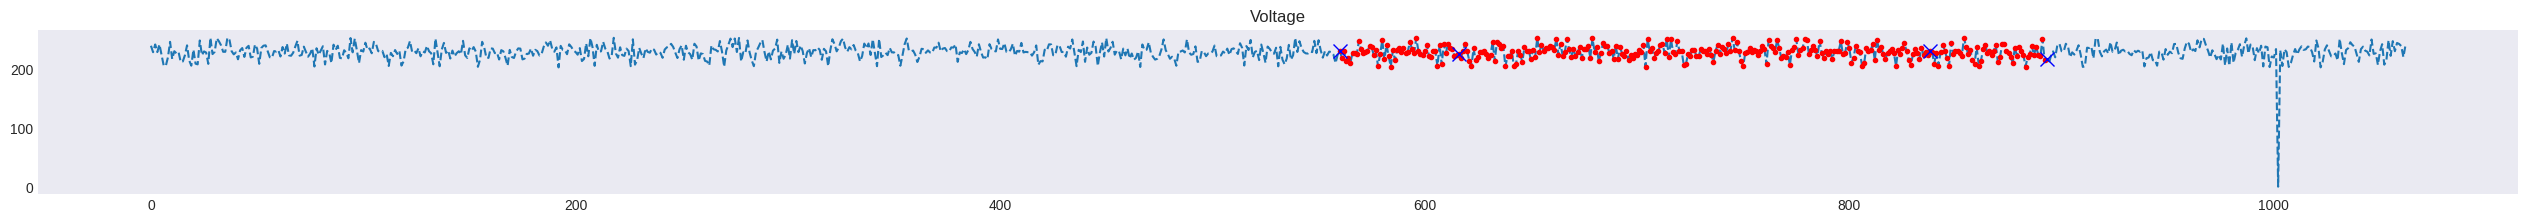

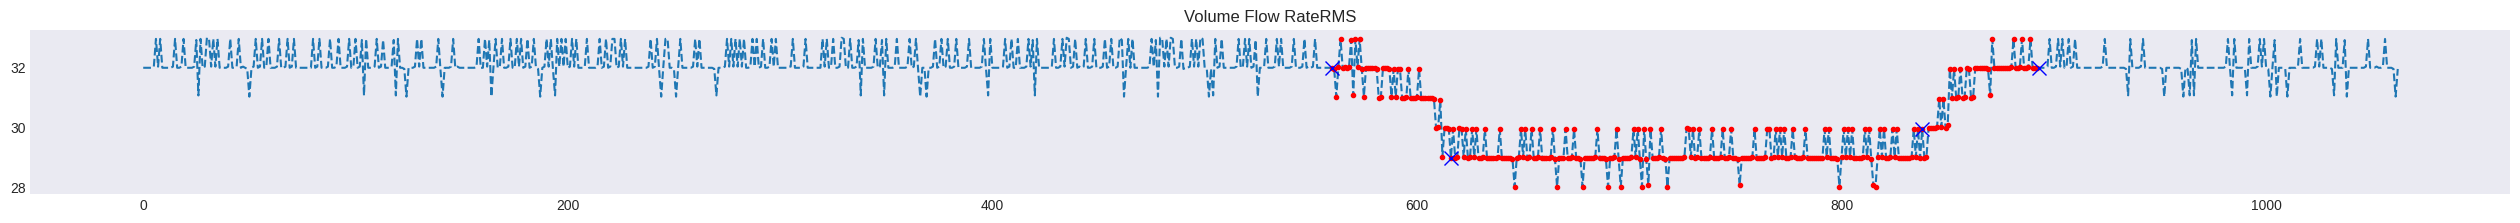

In [ ]:
#  (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.   (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

import numpy as np

plt.style.use(['seaborn-v0_8-dark'])
cond1=df['anomaly']==1
df2=df[cond1]

cond2=df['changepoint']==1
df3=df[cond2]

for v, i in enumerate(df.columns[1:9]) :
  plt.figure(figsize=(32,20))
  plt.subplot(8,1,v+1)
  plt.plot(df.index,df[i],linestyle='--')
  plt.plot(df2.index,df2[i],'o',color='red',markersize=3)
  plt.plot(df3.index,df3[i],'x',color='blue',markersize=10)
  plt.title(i)

## **🔒 [금융] 문제**
---
* **제시된 금융 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|
|isFlaggedFraud|의심사기거래|


In [ ]:
import pandas as pd
df2 = pd.read_csv('example_2.csv')
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
# (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
print(df2.shape)
print('---------------------------------------------')
# (2) Data type 확인 → 각 Column별 Data Type 출력

print(df2.info())
print('---------------------------------------------')

# (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
print(df2.isnull().sum())
print('---------------------------------------------')

(6362620, 11)
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
---------------------------------------------
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
---------------------------------------------


### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 지표들을 추출하시오.

  (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.

  (2) 'type'에 따른 사기율(%)을 계산하시오.

  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.
  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

```

In [ ]:
 # (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.
df2['isFraud'].value_counts()

OK_ratio=(df2['isFraud'].value_counts()[0]/len(df))*100
NG_ratio=(df2['isFraud'].value_counts()[1]/len(df))*100
OK_count=(df2['isFraud'].value_counts()[0])
NG_count=(df2['isFraud'].value_counts()[1])
TOTAL_count=len(df)

print(f"OK Count: {OK_count}")
print(f"NG Count: {NG_count}")
print(f"Total Count: {TOTAL_count}")
print(f"OK Ratio: {OK_ratio:.2f}%")
print(f"NG Ratio: {NG_ratio:.2f}%")

# 데이터 프레임 생성
pd.DataFrame({"count":df2['isFraud'].value_counts(),
              "ratio(%)":df2['isFraud'].value_counts(normalize=True)*100})

OK Count: 6354407
NG Count: 8213
Total Count: 1063
OK Ratio: 597780.53%
NG Ratio: 772.62%


,count,ratio(%)
0,6354407,99.870918
1,8213,0.129082


In [ ]:
#  (2) 'type'에 따른 사기율(%)을 계산하시오.
pd.DataFrame({"count":df2.groupby('type')['isFraud'].value_counts(),
              "ratio(%)":df2.groupby('type')['isFraud'].value_counts(normalize=True)*100})

count    ratio(%)
type     isFraud                     
CASH_IN  0        1399284  100.000000
CASH_OUT 0        2233384   99.816045
         1           4116    0.183955
DEBIT    0          41432  100.000000
PAYMENT  0        2151495  100.000000
TRANSFER 0         528812   99.231201
         1           4097    0.768799

In [ ]:
#  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)
pd.set_option('display.float_format', '{:.2f}'.format)

# 데이터 샘플링
df2_ok=df2[df2['isFraud']==0].sample(n=1000,replace=False)
df2_ng=df2[df2['isFraud']==1].sample(n=1000,replace=False)

# 데이터 프레임 생성
a1=df2_ok['amount'].describe()
a2=df2_ng['amount'].describe()
a3=pd.concat([a1,a2],axis=1)
a3.columns=['isFraud_0','isFraud_1']
a3

,isFraud_0,isFraud_1
count,1000.00,1000.00
mean,198910.67,1535272.32
std,648560.84,2445806.58
min,6.65,0.00
25%,13391.24,123146.28
50%,76225.57,477603.82
75%,223648.49,1742859.03
max,11697915.93,10000000.00


Text(0.5, 1.0, 'Distribution of amount by fraud')

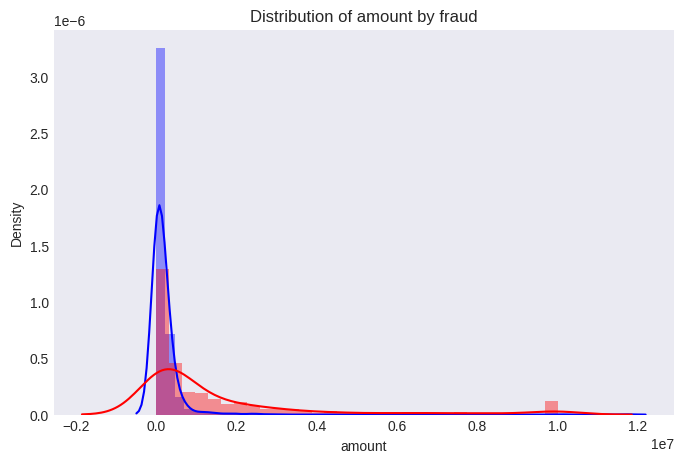

In [ ]:
#  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

# 히스토그램 분석
plt.figure(figsize=(8,5))
ax1=sns.distplot(df2_ok['amount'],color='blue')
ax2=sns.distplot(df2_ng['amount'],color='red')
ax1.set_title('Distribution of amount by fraud')

<Axes: xlabel='isFraud', ylabel='amount'>

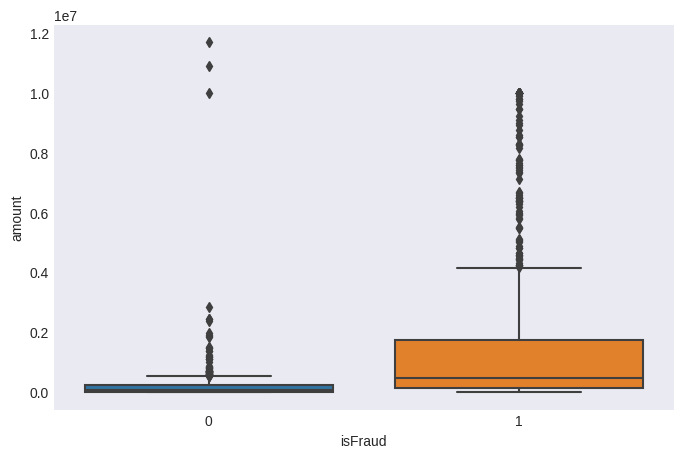

In [ ]:
#  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

# 박스플롯 분석
pd.set_option('display.float_format', '{:.2f}'.format)
df2_append=pd.concat([df2_ok,df2_ng])
plt.figure(figsize=(8,5))
sns.boxplot(data=df2_append,x='isFraud',y='amount',)


## **🔒 [게임] 문제**
---
* **제시된 게임 플레이 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|ID |ID|
|groupId |그룹ID|
|matchId |경기ID|
|assists |서포트횟수|
|boosts |부스트 아이템 사용횟수|
|damageDealt |총 입힌 데미지|
|DBNOs |적을 기절시킨 횟수|
|headshotKills |헤드샷킬수|
|heals |heal 아이템 사용횟수|
|killPlace |적을제압한위치|
|killPoints |적제압포인트|
|kills |적 제압횟수|
|killStreaks |가장 많이 적 제압횟수|
|longestKill |멀리서 적 제압횟수|
|maxPlace |최악의배치넘버|
|numGroups |그룹넘버|
|revives |부활횟수|
|rideDistance |이동수단 타고 이동거리|
|roadKills |이동수단으로 적 제압횟수|
|swimDistance|수영한거리|
|teamKills |같은팀 제압횟수|
|vehicleDestroys|자동차 파괴횟수|
|walkDistance|도보이동거리|
|weaponsAcquired|무기 획득횟수|
|winPoints|승점|
|winPlacePerc|승률|


In [ ]:
import pandas as pd
df3 = pd.read_csv('example_3.csv')
df3.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,24,0,0,5,247.30,2,0,4,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,1,440875,1,1,0,37.65,1,1,0,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,2,878242,2,0,1,93.73,1,0,2,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,4,1757883,4,0,1,0.00,0,0,1,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
# (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
print(df3.shape)
print('---------------------------------------------')
# (2) Data type 확인 → 각 Column별 Data Type 출력

print(df3.info())
print('---------------------------------------------')

# (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
print(df3.isnull().sum())
print('---------------------------------------------')

(6225249, 27)
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225249 entries, 0 to 6225248
Data columns (total 27 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               int64  
 2   groupId          int64  
 3   matchId          int64  
 4   assists          int64  
 5   boosts           int64  
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       int64  
 12  kills            int64  
 13  killStreaks      int64  
 14  longestKill      float64
 15  maxPlace         int64  
 16  numGroups        int64  
 17  revives          int64  
 18  rideDistance     float64
 19  roadKills        int64  
 20  swimDistance     float64
 21  teamKills        int64  
 22  vehicleDestroys  int64  
 23  walkDistance     float64
 24  weaponsAcquired  int64  
 25  winPoints   

<Axes: >

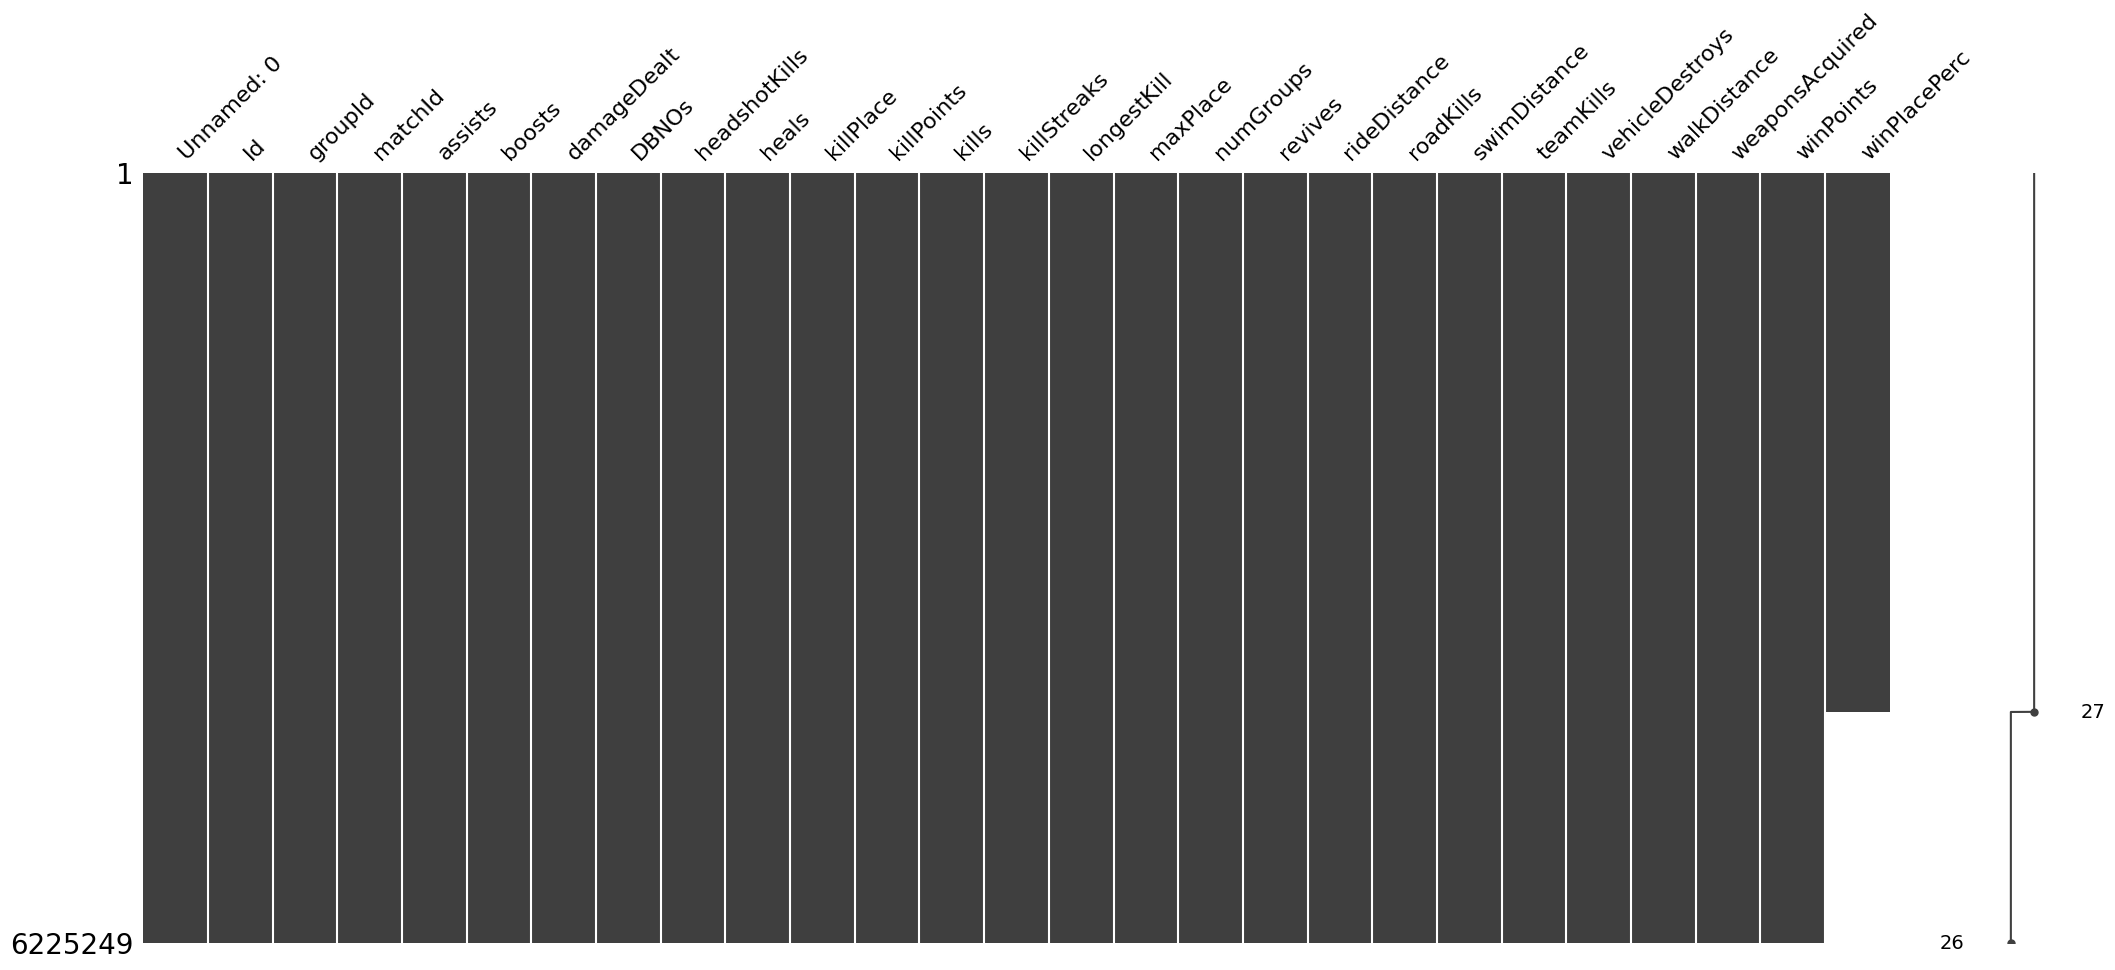

In [ ]:
# (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
from missingno import matrix

matrix(df3)

### Question 02

```
다음 가설들을 데이터 분석을 통해 검증하시오.

[가설]
Without moving & WeaponsAcquired - analyze
 : 이동 없이 무기를 획득한 버그 유저가 존재할까?

  (1) _totalDistance가 하위 10%인 Data set을 만드시오.
  (※ '_totalDistance' = 'rideDistance' + 'walkDistance' + 'swimDistance')

  (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

```

In [ ]:
# (1) _totalDistance가 하위 10%인 Data set을 만드시오.

# totalDistance 컬럼 생성
df3['totalDistance']=df3['rideDistance']+df3['walkDistance']+df3['swimDistance']

# totalDistance가 하위 10% 기준점 확인
df3['totalDistance'].quantile(0.10)

# 하위 10% 기준 data set 생성
df3_modifed=df3[df3['totalDistance']<df3['totalDistance'].quantile(0.10)]
df3_modifed.head(10)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0.00,0,0.00,0,0,21.49,1,1489,0.11,21.49
44,44,44,1540626,44,0,0,0.00,0,0,0,...,0.00,0,0.00,0,0,12.43,1,1470,0.11,12.43
68,68,68,2564268,68,0,0,0.00,0,0,0,...,0.00,0,0.00,0,0,11.88,0,1489,0.11,11.88
77,77,77,2604077,77,0,0,0.00,0,0,0,...,0.00,0,0.00,0,0,6.32,1,1438,0.00,6.32
85,85,85,2638861,85,0,0,85.41,0,0,0,...,0.00,0,0.00,0,0,36.19,2,1465,0.04,36.19
95,95,95,2683293,95,0,0,0.00,0,0,0,...,0.00,0,0.00,0,0,1.32,0,1500,0.14,1.32
123,123,123,106684,123,0,0,0.00,0,0,0,...,0.00,0,0.00,0,0,32.38,1,1500,0.15,32.38
126,126,126,119885,126,0,0,222.60,2,0,0,...,0.00,0,0.00,0,0,35.33,1,1536,0.04,35.33
131,131,131,142182,131,0,0,0.00,0,0,0,...,0.00,0,0.00,0,0,4.16,0,1500,0.20,4.16
139,139,139,179066,139,0,0,0.00,0,0,0,...,0.00,0,0.00,0,0,22.62,1,1486,0.40,22.62


In [ ]:
# (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.
# df3['weaponsAcquired'].quantile(0.99)

df3_bug_user=df3_modifed[df3_modifed['weaponsAcquired']>df3['weaponsAcquired'].quantile(0.99)]
len(df3_modifed[df3_modifed['weaponsAcquired']>df3['weaponsAcquired'].quantile(0.99)])


2323

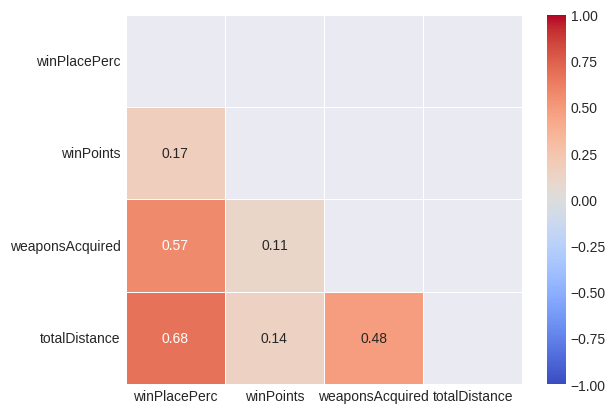

In [ ]:
# 가설 검정
df3['winPlacePerc'].corr(df3['totalDistance'])
df3['winPlacePerc'].corr(df3['totalDistance'])

# 주요 인자 상관관계 분석
df3_corr=df3[['winPlacePerc','winPoints','weaponsAcquired','totalDistance']].corr()
sns.heatmap(df3_corr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5,mask=np.triu(df3_corr.corr()));

# df3[['weaponsAcquired','totalDistance']].corr() = 0.48 로서 약한 상관 관계를 보이고 있음
# 어느정도 핵이 의심 될 수도 있음, 여러 그래프를 시각화해서 판단하는것이 유리할 것 같음

In [ ]:
len(df3.columns[4:])

24

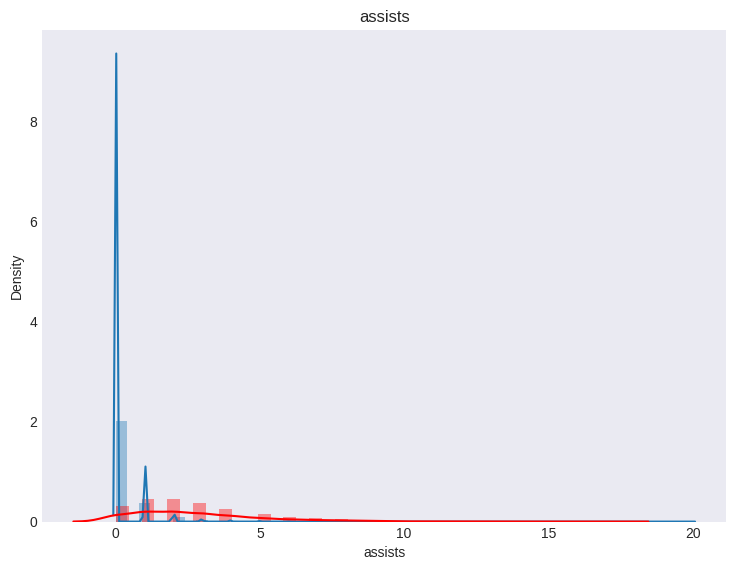

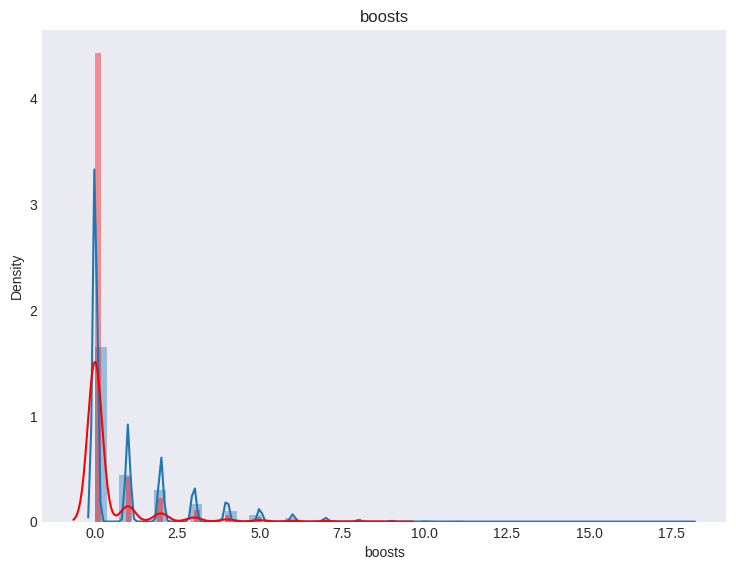

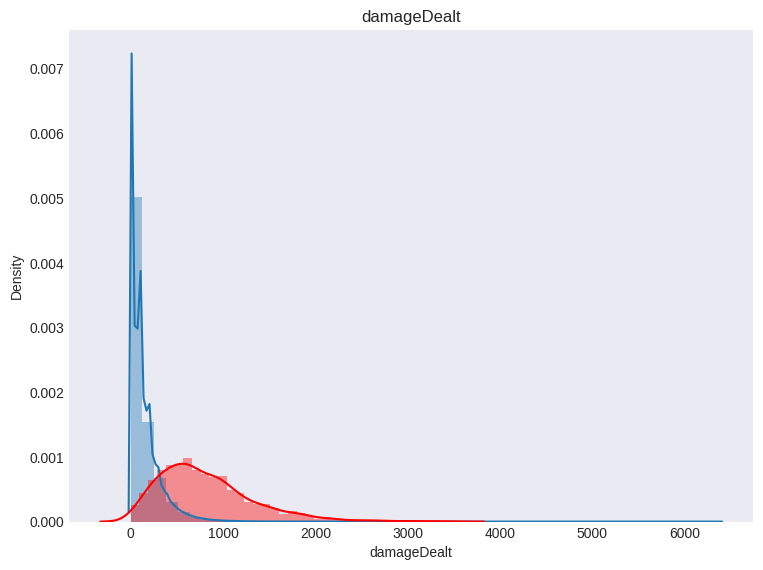

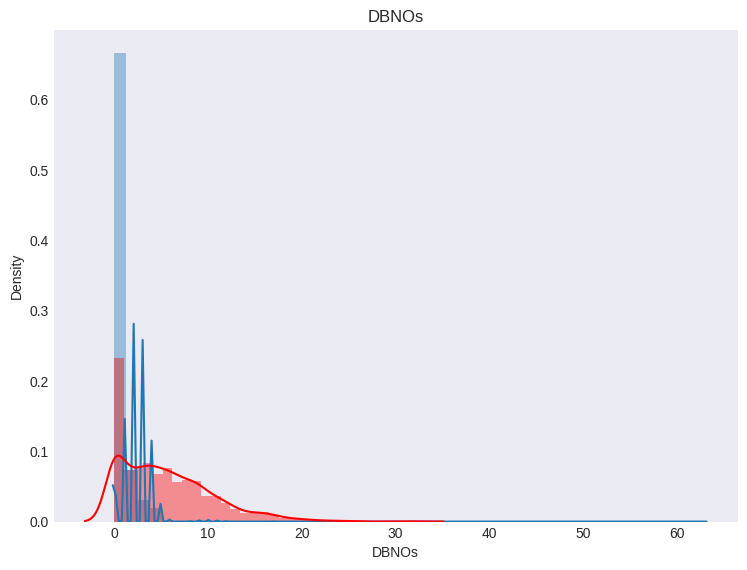

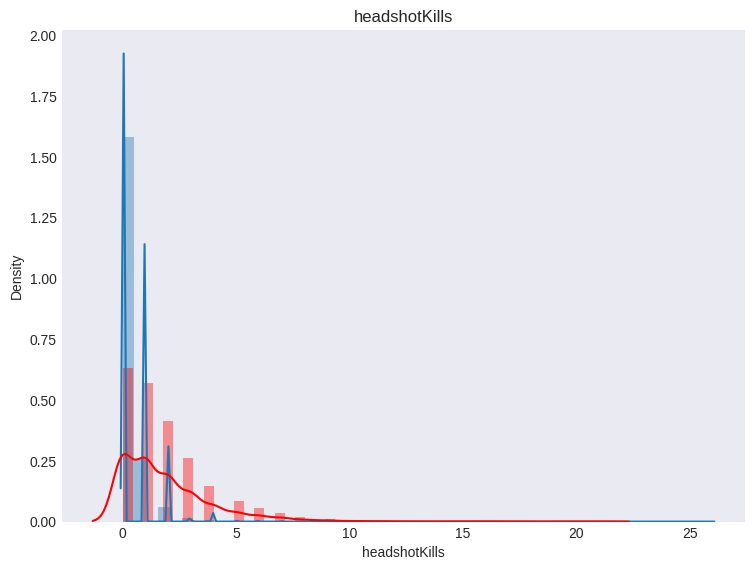

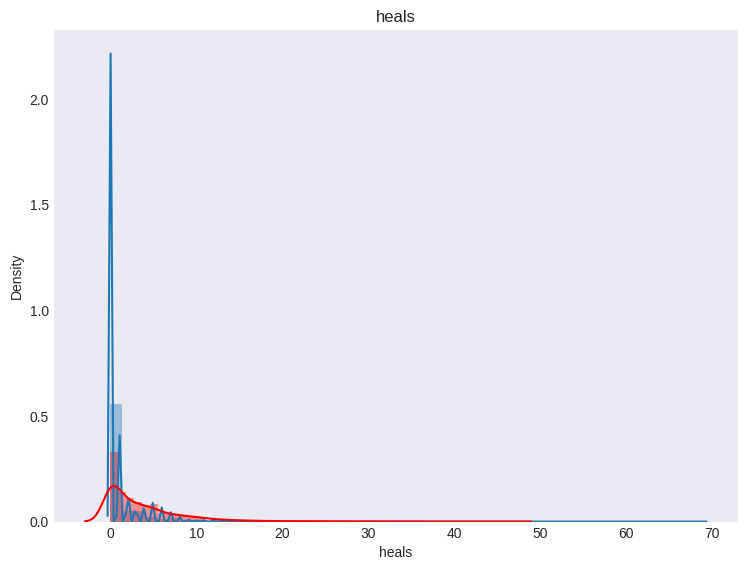

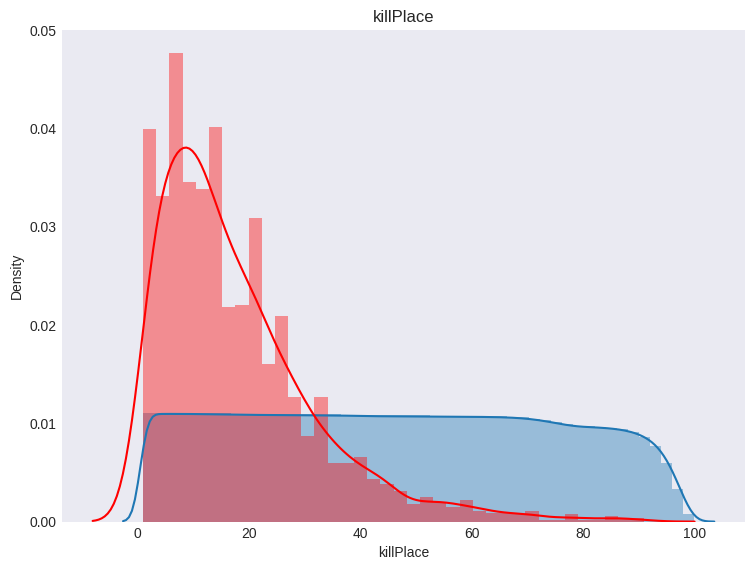

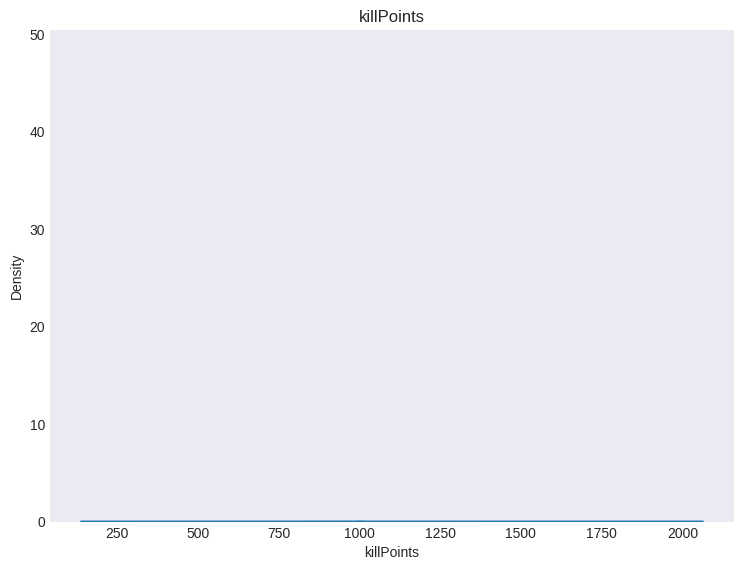

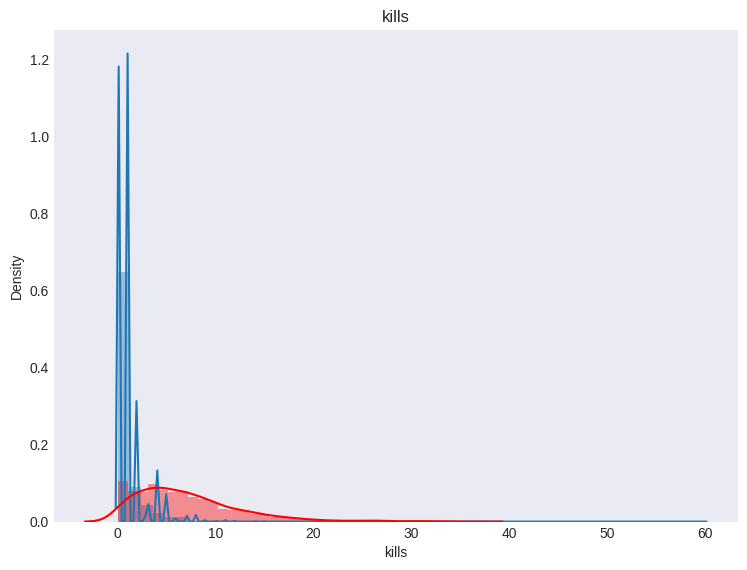

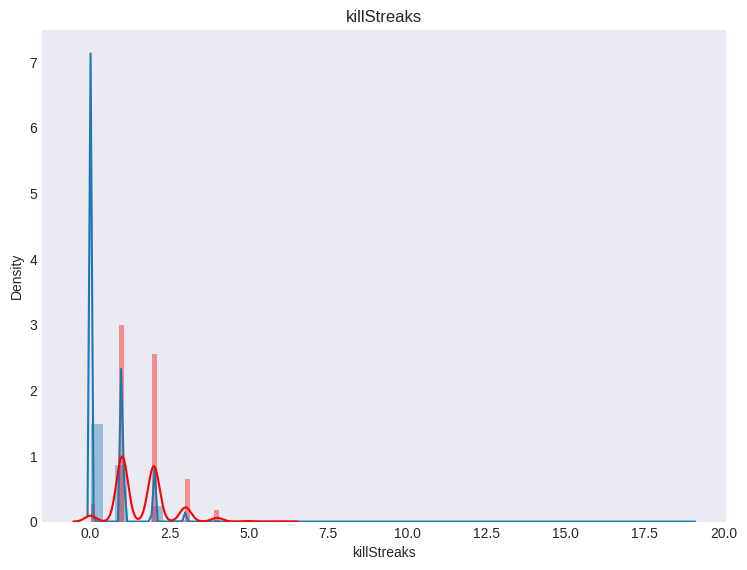

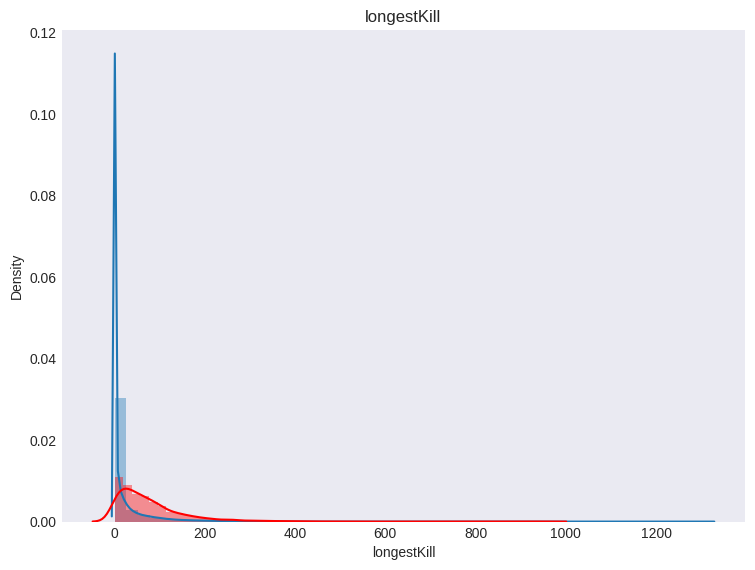

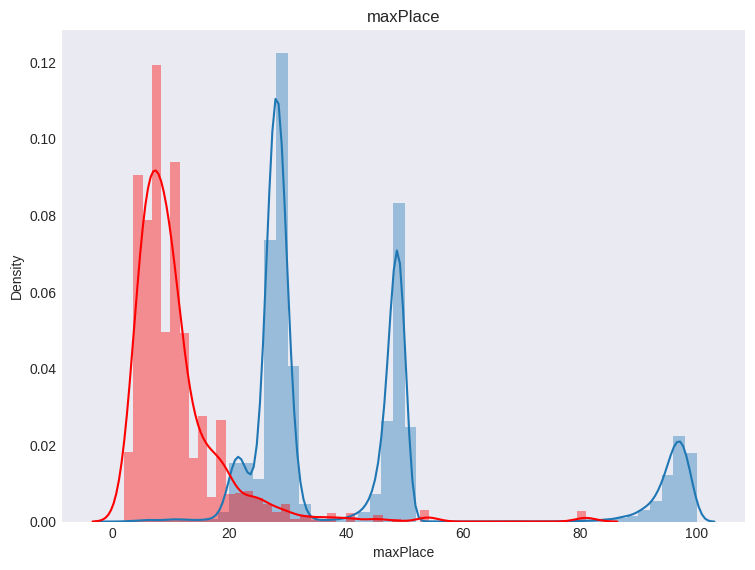

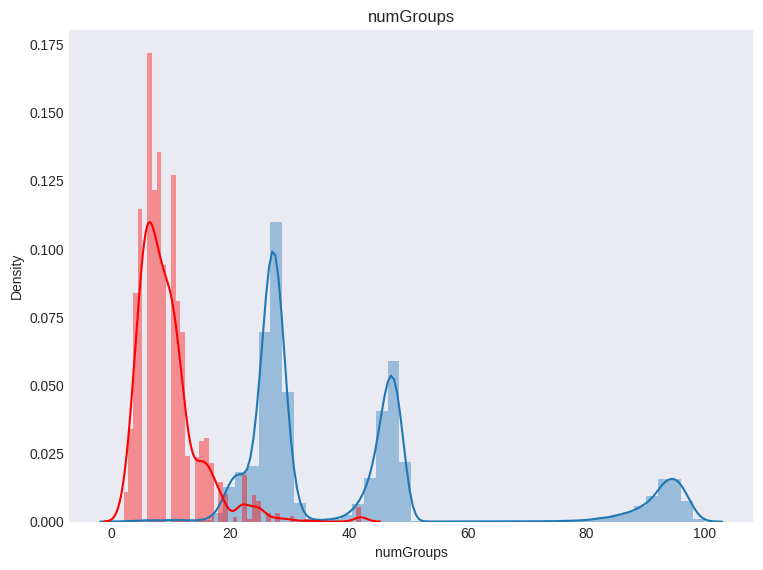

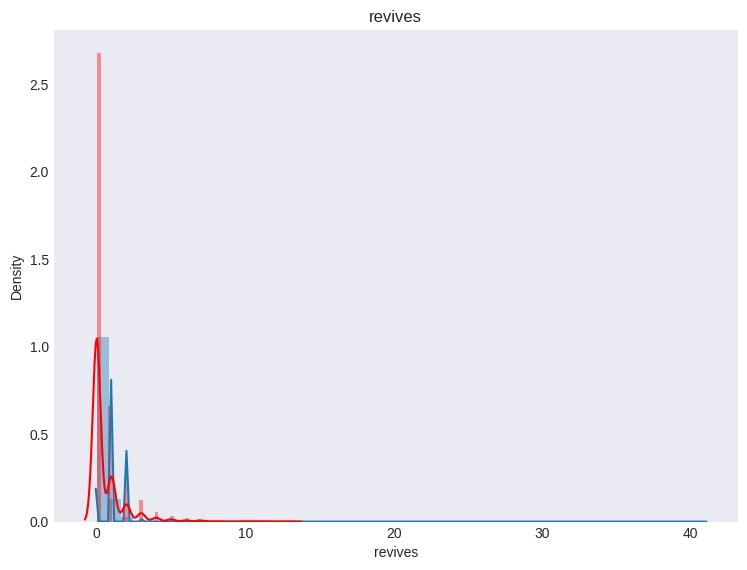

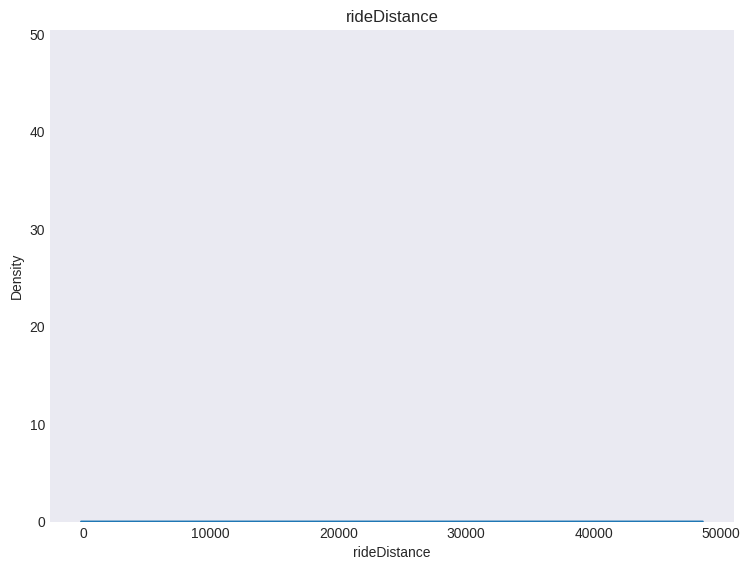

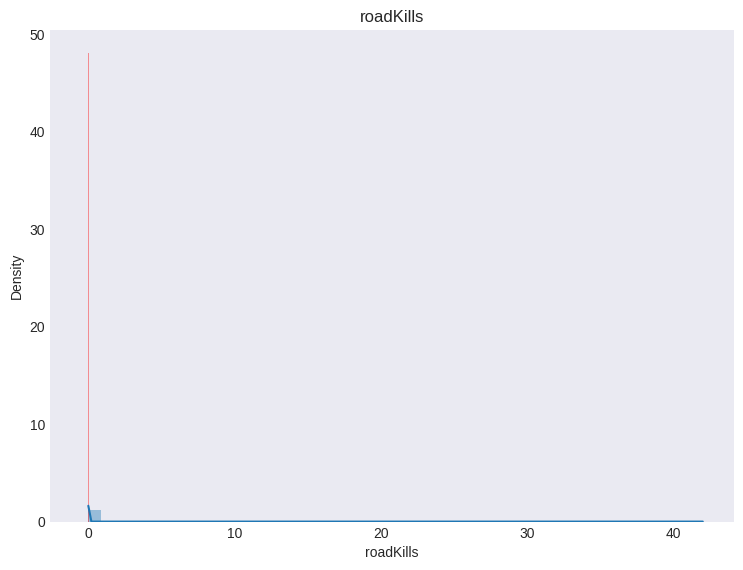

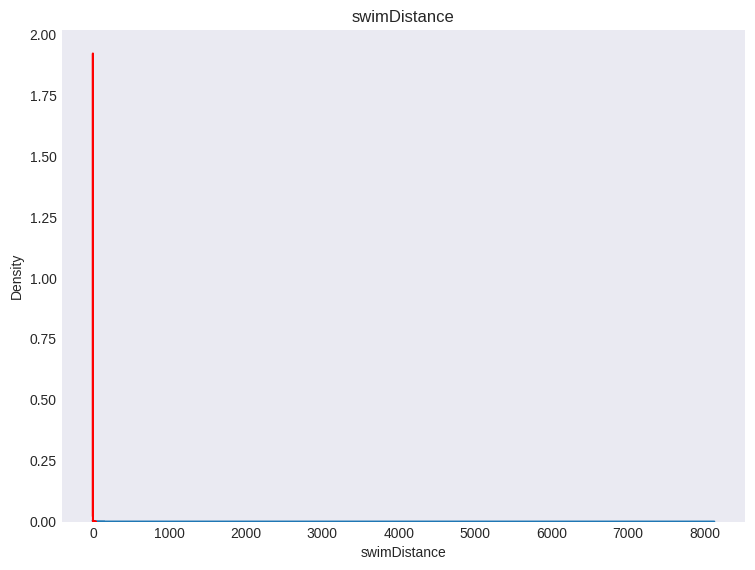

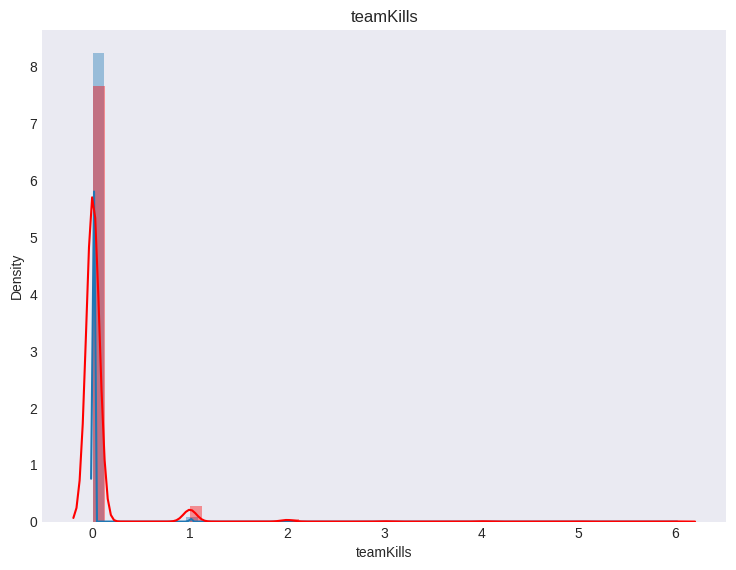

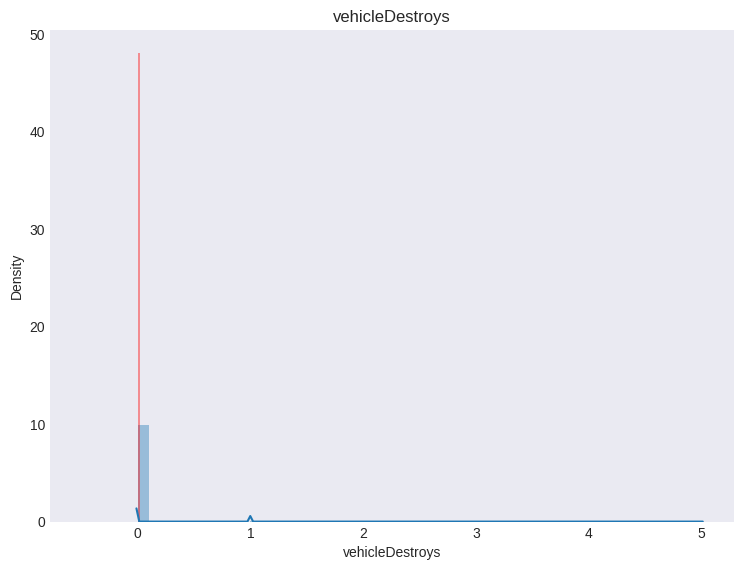

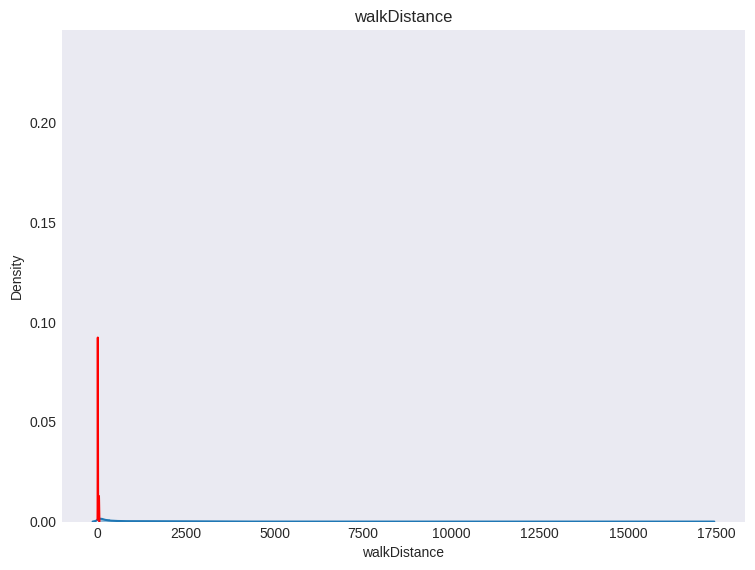

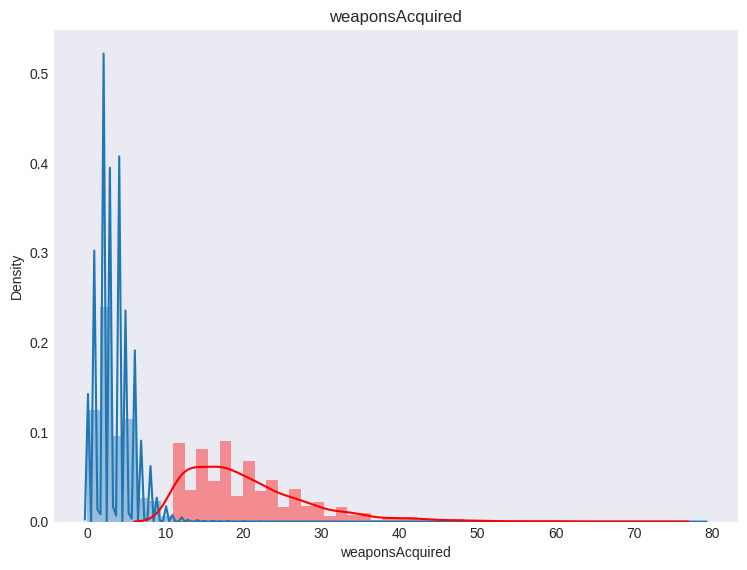

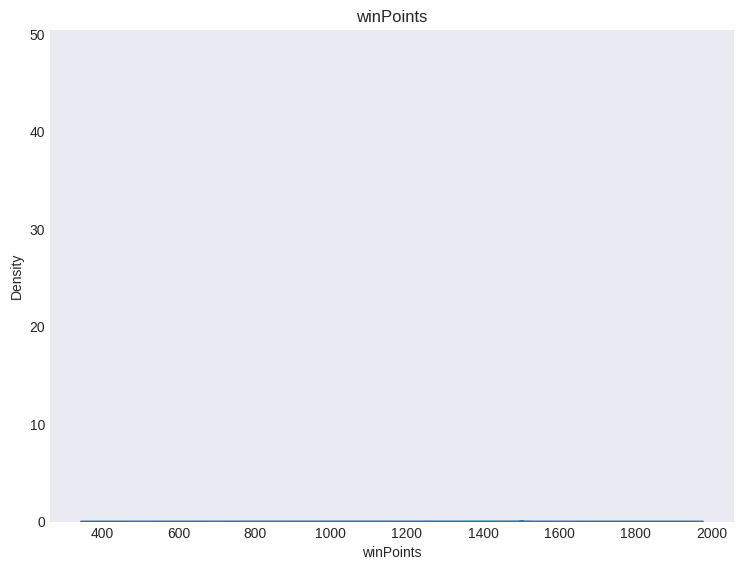

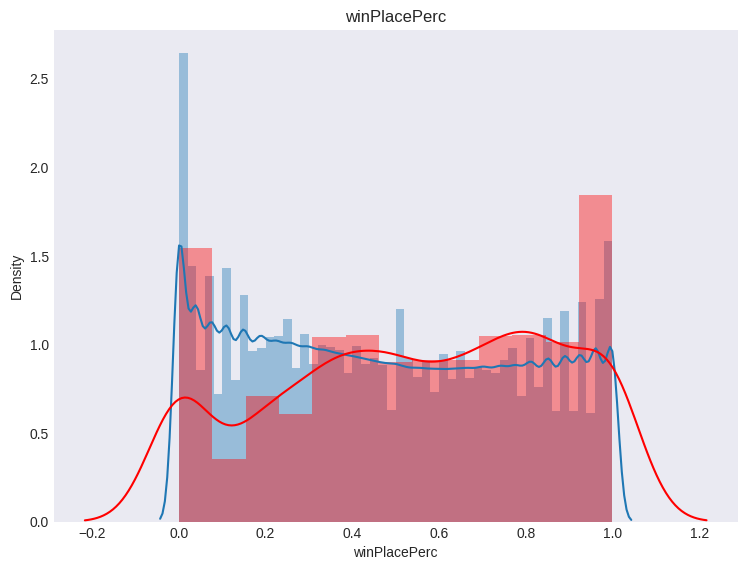

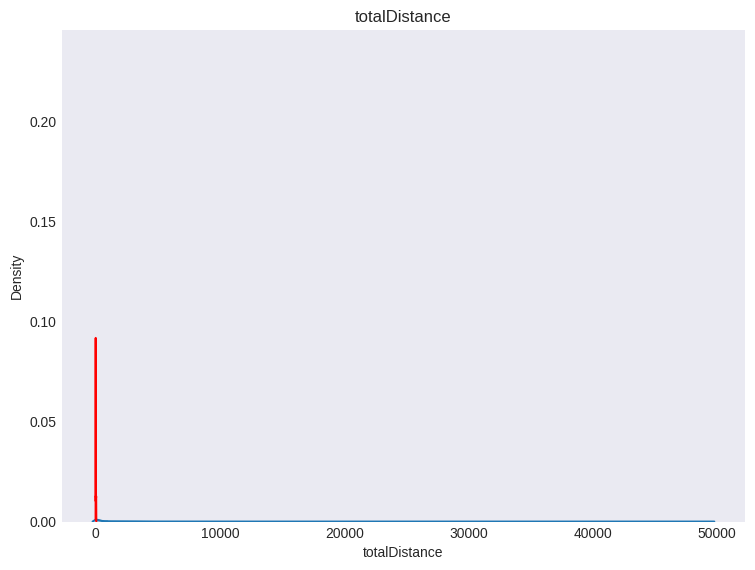

In [ ]:
# 특성 요인 시각화

for v, i in enumerate(df3.columns[4:]) :
  plt.figure(figsize=(30,60))
  plt.subplot(8,3,v+1)
  sns.distplot(df3[i])
  sns.distplot(df3_bug_user[i],color='red')
  plt.title(i)

#  ax1=sns.distplot(df2_ok['amount'],color='blue')